为了讨论损失函数 \( L(w, b) \) 使用 \( \tanh(kx) \) 近似 \( \text{sign}(x) \) 后的凹凸性，我们首先需要考虑 \( \tanh(kx) \) 的二阶导数。

1. 计算 \( \tanh(kx) \) 的一阶导数和二阶导数。

\[ \frac{d}{dx} \tanh(kx) = k \text{sech}^2(kx) \] （2）

\[ \frac{d^2}{dx^2} \tanh(kx) = -2k^2 \text{sech}^2(kx) \tanh(kx) \] （3）

2. 为了确定函数的凹凸性，我们需要检查二阶导数的符号。

从公式（3）中，我们可以看到 \( \tanh(kx) \) 的二阶导数的符号取决于 \( \tanh(kx) \)。当 \( x > 0 \) 时，\( \tanh(kx) > 0 \)，因此二阶导数为负；当 \( x < 0 \) 时，\( \tanh(kx) < 0 \)，因此二阶导数为正。这意味着 \( \tanh(kx) \) 在 \( x = 0 \) 处是拐点，且函数在 \( x > 0 \) 时是凹的，在 \( x < 0 \) 时是凸的。

3. 对于损失函数 \( L(w, b) \)，我们考虑 \( g(x_i; w, b) y_i \) 的值。当 \( g(x_i; w, b) y_i > 0 \) 时，样本被正确分类，此时 \( \tanh(k g(x_i; w, b) y_i) \) 是凹的；当 \( g(x_i; w, b) y_i < 0 \) 时，样本被错误分类，此时 \( \tanh(k g(x_i; w, b) y_i) \) 是凸的。

结论：利用 \( \tanh(kx) \) 近似 \( \text{sign}(x) \) 后，损失函数 \( L(w, b) \) 的凹凸性取决于样本是否被正确分类。对于被正确分类的样本，损失函数是凹的；对于被错误分类的样本，损失函数是凸的。因此，整体损失函数 \( L(w, b) \) 是非凸的。

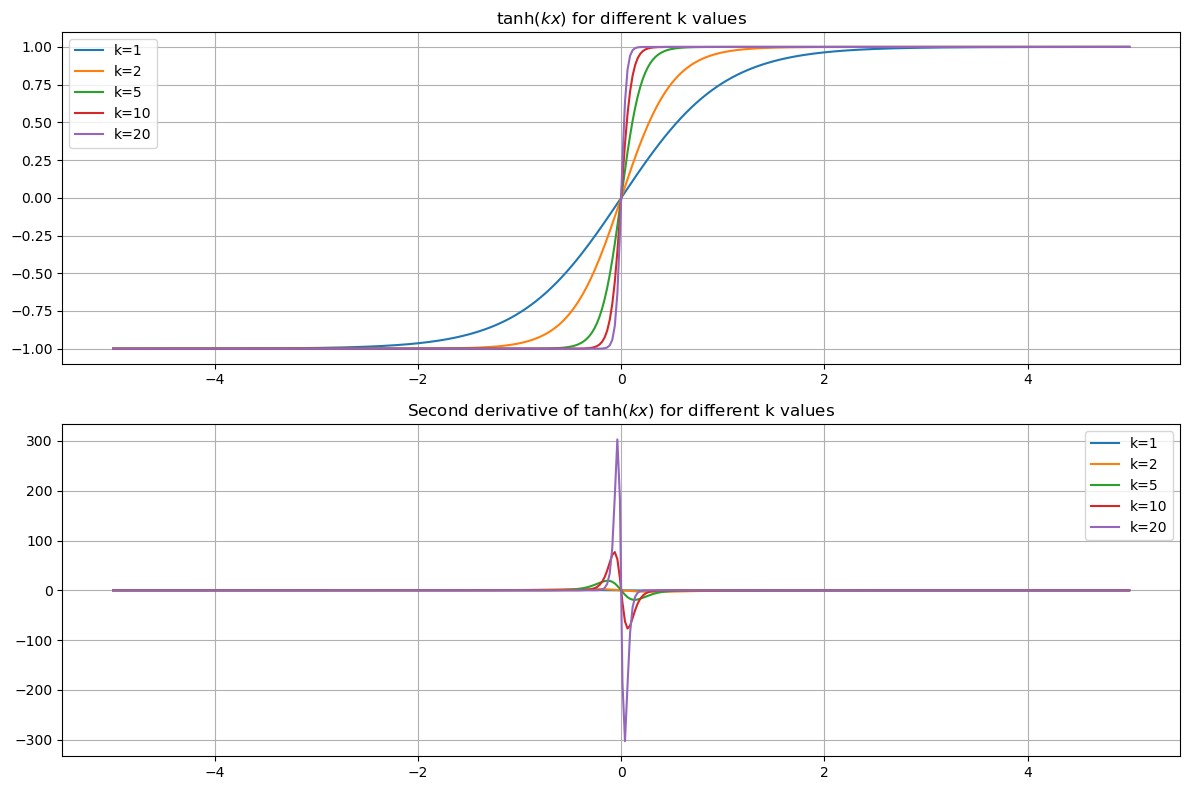

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义tanh(kx)函数和它的二阶导数
def tanh_kx(x, k=1):
    return np.tanh(k * x)

def d2_tanh_kx(x, k=1):
    return -2 * k**2 * (1 / np.cosh(k * x))**2 * np.tanh(k * x)

# 生成x值
x = np.linspace(-5, 5, 400)

# 定义不同的k值
k_values = [1, 2, 5, 10, 20]

plt.figure(figsize=(12, 8))

# 绘制tanh(kx)函数
plt.subplot(2, 1, 1)
for k in k_values:
    plt.plot(x, tanh_kx(x, k), label=f'k={k}')
plt.title(r'$\tanh(kx)$ for different k values')
plt.grid(True)
plt.legend()

# 绘制二阶导数
plt.subplot(2, 1, 2)
for k in k_values:
    plt.plot(x, d2_tanh_kx(x, k), label=f'k={k}')
plt.title(r'Second derivative of $\tanh(kx)$ for different k values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

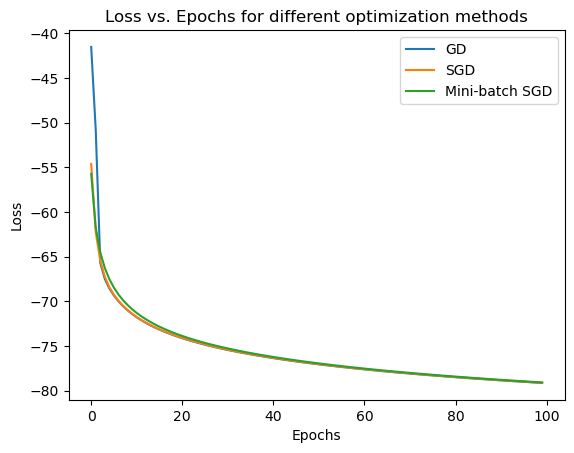

In [5]:
import torch
import torch.nn as nn

# 生成模拟数据
N = 100
torch.manual_seed(0)
X = torch.randn(N, 1)
w_true = torch.tensor([[2.0]])
b_true = torch.tensor([1.0])
y = X @ w_true + b_true + 0.1 * torch.randn(N, 1)

# 定义模型和损失函数
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

def loss_fn(outputs, labels):
    return torch.sum(torch.tanh(outputs * labels))

# 优化函数
def optimize(model, optimizer, X, y, method="GD", batch_size=10):
    if method == "SGD":
        indices = torch.randperm(N)
        for i in indices:
            optimizer.zero_grad()
            loss = -loss_fn(model(X[i]), y[i])
            loss.backward()
            optimizer.step()
    elif method == "Mini-batch SGD":
        indices = torch.randperm(N)
        for i in range(0, N, batch_size):
            optimizer.zero_grad()
            loss = -loss_fn(model(X[i:i+batch_size]), y[i:i+batch_size])
            loss.backward()
            optimizer.step()
    else:  # GD
        optimizer.zero_grad()
        loss = -loss_fn(model(X), y)
        loss.backward()
        optimizer.step()

# 初始化模型和优化器
model = LinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 优化并记录损失
losses_GD = []
losses_SGD = []
losses_MiniBatchSGD = []

for epoch in range(100):
    optimize(model, optimizer, X, y, method="GD")
    losses_GD.append(-loss_fn(model(X), y).item())

model = LinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(100):
    optimize(model, optimizer, X, y, method="SGD")
    losses_SGD.append(-loss_fn(model(X), y).item())

model = LinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(100):
    optimize(model, optimizer, X, y, method="Mini-batch SGD")
    losses_MiniBatchSGD.append(-loss_fn(model(X), y).item())

# 绘制损失曲线
plt.plot(losses_GD, label="GD")
plt.plot(losses_SGD, label="SGD")
plt.plot(losses_MiniBatchSGD, label="Mini-batch SGD")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for different optimization methods")
plt.show()